
## Dimensionality Reduction and Clustering

The MNIST data set is hand-drawn digits, from zero through nine.Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

Use PCA to reduce the dimensionality

    a. How many components did you use? Why?

    b. Plot the first two components. Do you notice any trends? What is this plot showing us?

    c. Why would you use PCA? What is it doing? And what are the drawbacks?

    d. Plot some of the images, then compress them using PCA and plot again. How does it look?

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?

    b. How robust is it to changes in perplexity?

    c. How robust is it to different learning rate and number of iterations?

Perform k-means clustering:

    a. How did you choose k?

    b. How did you evaluate your clustering?

    c. Visualize your clusters using t-sne

    d. Did you scale your data?

    e. How robust is your clustering?

Perform hierarchical clustering:

    a. Plot your dendrogram

    b. How many clusters seem reasonable based off your graph?

    c. How does your dendrogram change with different linkage methods?

### Grading
This homework is due March 22, 2018 by midnight Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

### Rubric:

- Code Quality - 10%
- Storytelling - 10%
- PCA - 20%
- T-SNE - 20%
- K-means - 20%
- Hierarchical Clustering - 20%

In [6]:
from sklearn.datasets import fetch_mldata

We can use this package to import the MNIST data set of handwritten digits.  We will also scale our data.

In [7]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

Great!  Let's bring in a few more packages and we'll be ready to tackle PCA.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

## PCA

We can start by looking at just two components with PCA.

In [10]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

And we can see that this does indeed reduce our dimensionality to only two components.

In [81]:
X_2dim.shape

(70000, 2)

What percent of variance in our data is explained by only two components?

In [12]:
pca.explained_variance_ratio_

array([ 0.09746116,  0.07155445])

Between the two components, we are explaining about 17% of the data.  That leaves a bit to be desired.  This is a pretty intuitive result as two variables can hardly be expected to explain much of the data alone.  We can graph the explained variance ratio across varying dimensions to inform our choice of an optimal number of components.

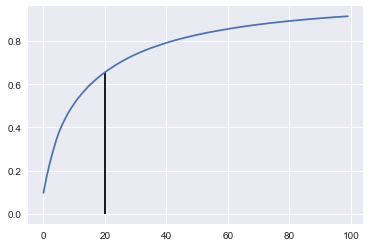

In [13]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)

Based on this chart, we know that the rate at which the variance explained ratio is increasing begins to slow down after 20 components.  For this reason I will elect to use 20 components.

In [15]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


We can plot the two principal components against each other to see if we observe any clear trends.

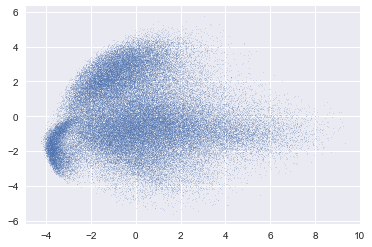

In [16]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=.1,alpha=.55)

As we can see from the plot, there isn't a clear relationship between the two components.  This isn't too surprising since a strong relationship between our components would imply redundancy in our features.

c. Why would you use PCA? What is it doing? And what are the drawbacks?

We use PCA to reduce the dimensionality of our data.  Reducing dimensionality helps us avoid overfitting.

d. Plot some of the images, then compress them using PCA and plot again. How does it look?

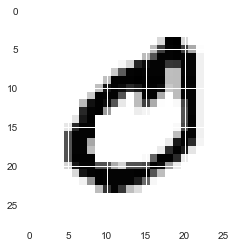

In [17]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

In [18]:
mnist=mnist.data

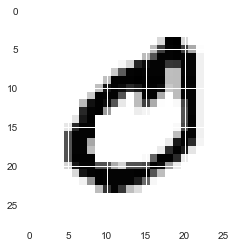

In [19]:
plt.imshow(mnist[1].reshape((28,28)), cmap='Greys')

## T-SNE

In [20]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline


mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [21]:
print(X.shape)

(70000, 784)


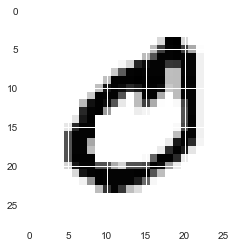

In [22]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

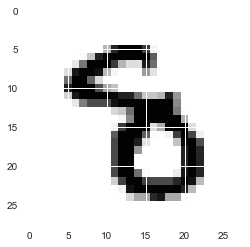

In [23]:
plt.imshow(X[50000].reshape((28,28)), cmap='Greys')

In [24]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.923458
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.211939
[t-SNE] Error after 200 iterations: 1.211939


In [25]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

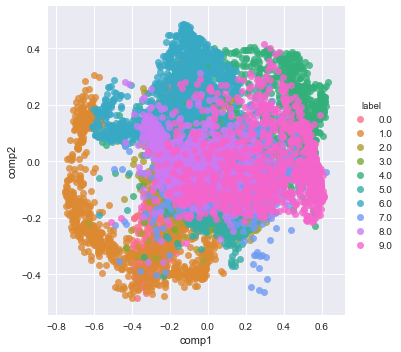

In [26]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

a. How does this plot differ from your PCA plot?

b. How robust is it to changes in perplexity?

In [27]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.363276
[t-SNE] KL divergence after 50 iterations with early exaggeration: 2.294070
[t-SNE] Error after 250 iterations: 2.294070


In [28]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

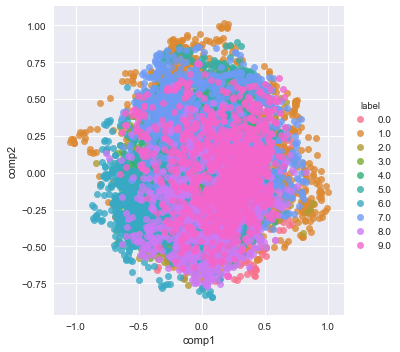

In [29]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.188622
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.847614
[t-SNE] Error after 75 iterations: 0.847614


In [31]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

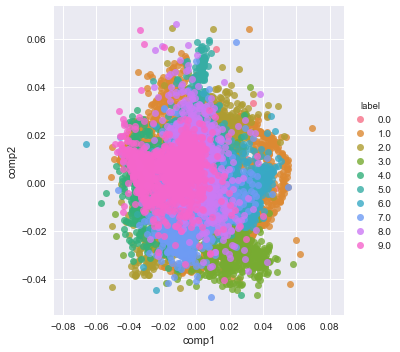

In [32]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

In [33]:
tsne = TSNE(n_components=2, verbose=1, perplexity=500, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.869300
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.299233
[t-SNE] Error after 75 iterations: 0.299233


In [34]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

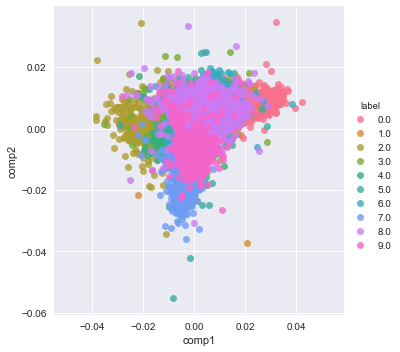

In [35]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

c. How robust is it to different learning rate and number of iterations?

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.923458
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.196245
[t-SNE] Error after 325 iterations: 1.196245


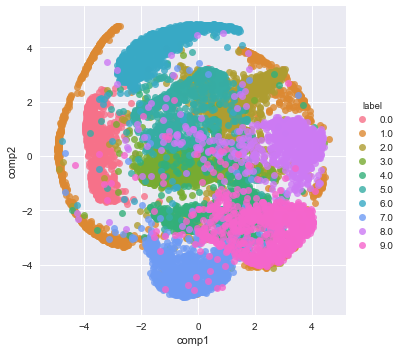

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=500)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.923458
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.211992
[t-SNE] Error after 75 iterations: 1.211992


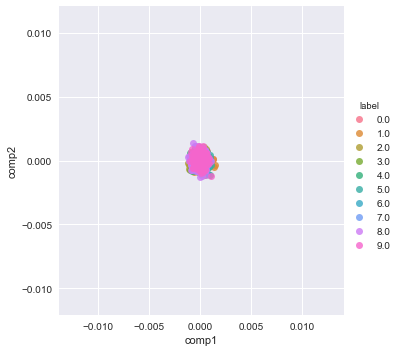

In [37]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.923458
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.211953
[t-SNE] Error after 225 iterations: 1.211953


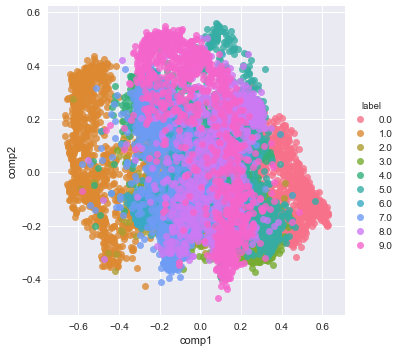

In [38]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.923458
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.211940
[t-SNE] Error after 200 iterations: 1.211940


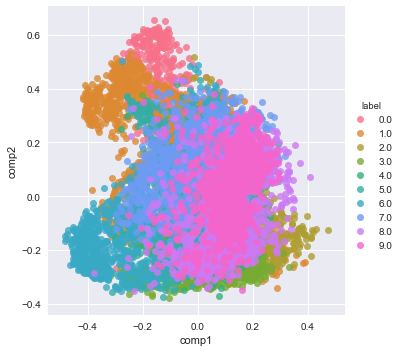

In [39]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=200, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

## K-Means

a. How did you choose k?

b. How did you evaluate your clustering?

c. Visualize your clusters using t-sne

d. Did you scale your data?

e. How robust is your clustering?

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=50, n_jobs=-1)
kmeans.fit(X)
sk_clusters = kmeans.predict(X)

#plt.scatter(X[]), c=sk_clusters)
#plt.xlabel("x")
#plt.ylabel("y")
#plt.xlim(0,120000)
#plt.ylim(0,120000)
#plt.plot(range(120000), range(120000))

10 classes means 10 k

In [53]:
kmeans = KMeans(n_clusters=10, n_init=25, n_jobs=1)
kmeans.fit(X[:n_select,:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=25, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

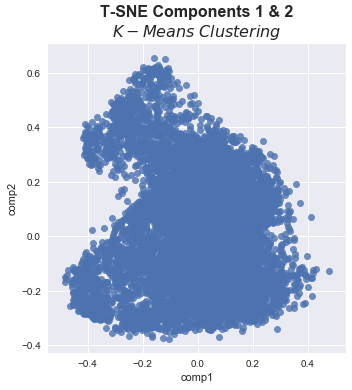

In [80]:
sns.lmplot(x='comp1', y='comp2', data=tsne, fit_reg=False)
plt.title('T-SNE Components 1 & 2\n$\it{K-Means}$ $\it{Clustering}$', fontsize=16, fontweight='bold')

## Hierarchical Clustering

Perform hierarchical clustering:

a. Plot your dendrogram

b. How many clusters seem reasonable based off your graph?

c. How does your dendrogram change with different linkage methods?

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

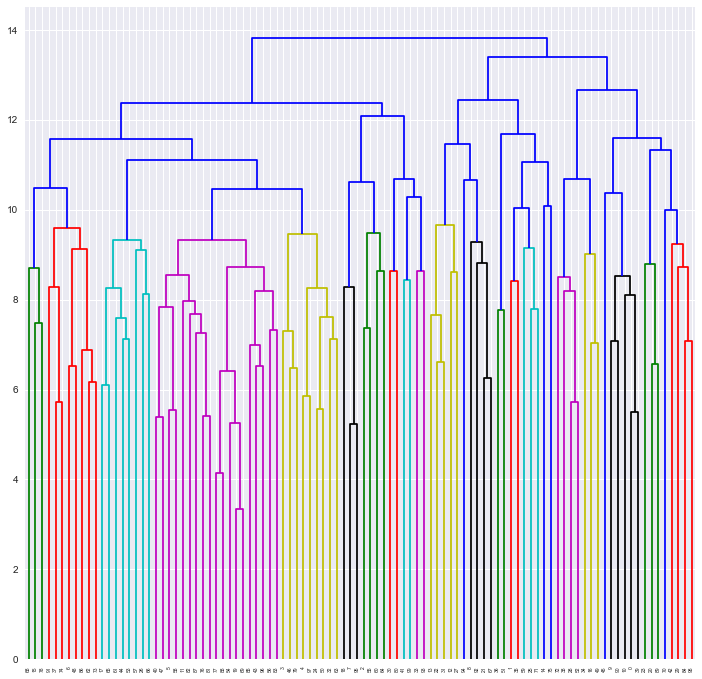

In [55]:
x_shuffle = shuffle(X, random_state=42)
Z = linkage(x_shuffle[:100], 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)